<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/HACKATON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import itertools
import time
import random

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier



In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Sleep_Data_1 (1).csv')
data.shape #(768,9)


(2955, 5)

In [ ]:
data

In [ ]:
data.head(50)

In [ ]:
tmp = data.iloc[:36]
tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
tmp['Value']= tmp['Value'].replace('Core',2)
tmp['Value']= tmp['Value'].replace('REM',3)
tmp['Value']= tmp['Value'].replace('Deep',1)
tmp['Value']= tmp['Value'].replace('Awake',4)
tmp['Value']= tmp['Value'].replace('InBed',0)
tmp = tmp[["Duration (hr)", "Value"]]
tmp = np.array(tmp)
tmp


In [ ]:
x_list = []
for x in tmp:
  if x[1] != 0:
    timeseries = np.ones([int(x[0])]) * x[1]
    x_list.append(timeseries)

In [ ]:
ts = np.concatenate(x_list)

In [ ]:
plt.plot(ts)


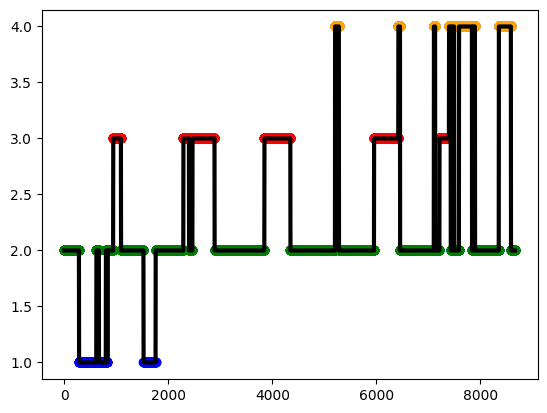

In [ ]:
y = ts
x = np.arange(len(y))

# 생성 제외할 값의 기준
threshold = 2
core= 2 
deep = 1
inbed = 0
rem = 3
awake = 4

# line plot
plt.plot(x, y, color='black',linewidth=3)

below_threshold =  y > threshold
below_core = core<=y
below_deep = deep<=y
below_rem = rem<=y
below_awake = awake<=y

# Add above threshold markers
plt.scatter(x[below_deep], y[below_deep], color='blue') 
plt.scatter(x[below_core], y[below_core], color='green') 
plt.scatter(x[below_rem], y[below_rem], color='red') 
plt.scatter(x[below_awake], y[below_awake], color='orange') 


In [ ]:
for state in ["Awake", "Core", "REM", "Deep", "InBed"]:
  tmp = data[data["Value"]==state]
  duration = tmp["Duration (hr)"]
  print(f"{state} 최소: {duration.min()}, 최대: {duration.max()}")

Awake 최소: 0.008, 최대: 0.692
Core 최소: 0.008, 최대: 1.73
REM 최소: 0.008, 최대: 1.19
Deep 최소: 0.008, 최대: 1.02
InBed 최소: 0.0, 최대: 9.73


1. 잠자는 시간이 2시간 이상일 때가 하루치 잠이니깐, 이걸 기준으로 데이터를 나눈다.
2. 

In [ ]:
start_date = '2023-02-25 12:00:00'
end_date = '2023-03-26 12:00:00'
first = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

In [ ]:
first["Duration (hr)"] = first["Duration (hr)"].astype('float') * 1000
first['Value']= first['Value'].replace('Core',2)
first['Value']= first['Value'].replace('REM',3)
first['Value']= first['Value'].replace('Deep',1)
first['Value']= first['Value'].replace('Awake',4)
first['Value']= first['Value'].replace('InBed',0)
first = first[["Duration (hr)", "Value"]]
first = np.array(first)



<ipython-input-165-cde20c0ab9a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first["Duration (hr)"] = first["Duration (hr)"].astype('float') * 1000
<ipython-input-165-cde20c0ab9a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['Value']= first['Value'].replace('Core',2)
<ipython-input-165-cde20c0ab9a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
x_list = []
for x in first:
  if x[1] != 0:
    timeseries = np.ones([int(x[0])]) * x[1]
    x_list.append(timeseries)
    
ts = np.concatenate(x_list)



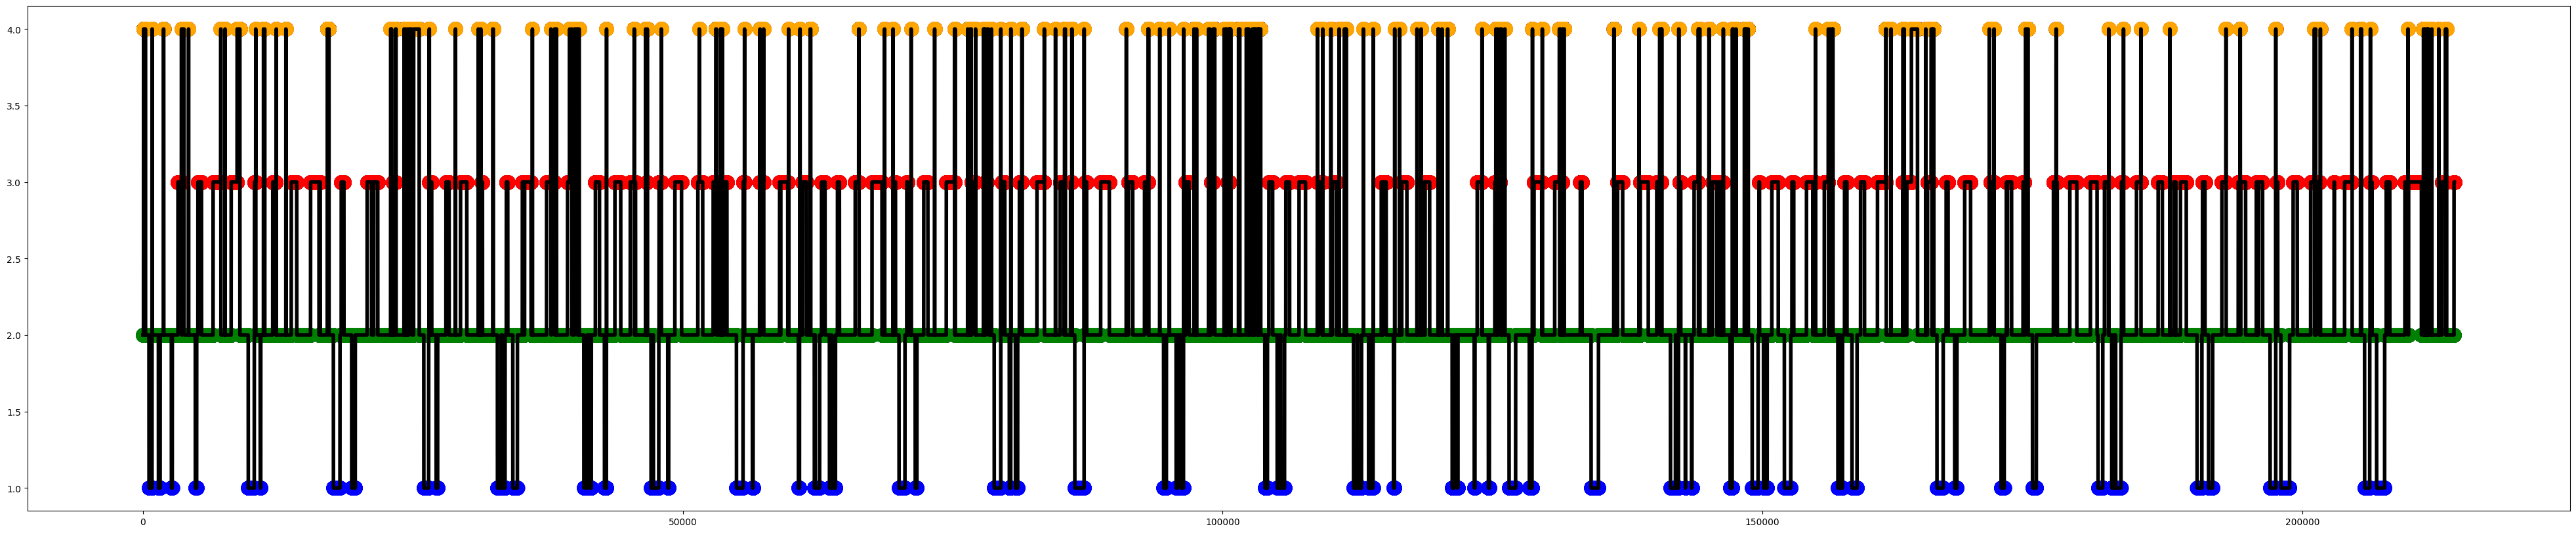

In [ ]:
y = ts
x = np.arange(len(y))

# 생성 제외할 값의 기준
threshold = 2
core= 2 
deep = 1
inbed = 0
rem = 3
awake = 4

# line plot
plt.figure(figsize=(50,10))
plt.plot(x, y, color='black',linewidth=4)

below_core = core<=y
below_deep = deep<=y
below_rem = rem<=y
below_awake = awake<=y

# Add above threshold markers
plt.scatter(x[below_deep], y[below_deep], color='blue',linewidth=10) 
plt.scatter(x[below_core], y[below_core], color='green',linewidth=10) 
plt.scatter(x[below_rem], y[below_rem], color='red',linewidth=10) 
plt.scatter(x[below_awake], y[below_awake], color='orange',linewidth=10) 


In [ ]:
start_date = '2023-03-26 12:00:00'
end_date = '2023-04-21 12:00:00'
second = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

In [ ]:
second["Duration (hr)"] = second["Duration (hr)"].astype('float') * 1000
second['Value']= second['Value'].replace('Core',2)
second['Value']= second['Value'].replace('REM',3)
second['Value']= second['Value'].replace('Deep',1)
second['Value']= second['Value'].replace('Awake',4)
second['Value']= second['Value'].replace('InBed',0)
second = second[["Duration (hr)", "Value"]]
second = np.array(second)



In [ ]:
x_list = []
for x in second:
  if x[1] != 0:
    timeseries = np.ones([int(x[0])]) * x[1]
    x_list.append(timeseries)
    
ts = np.concatenate(x_list)


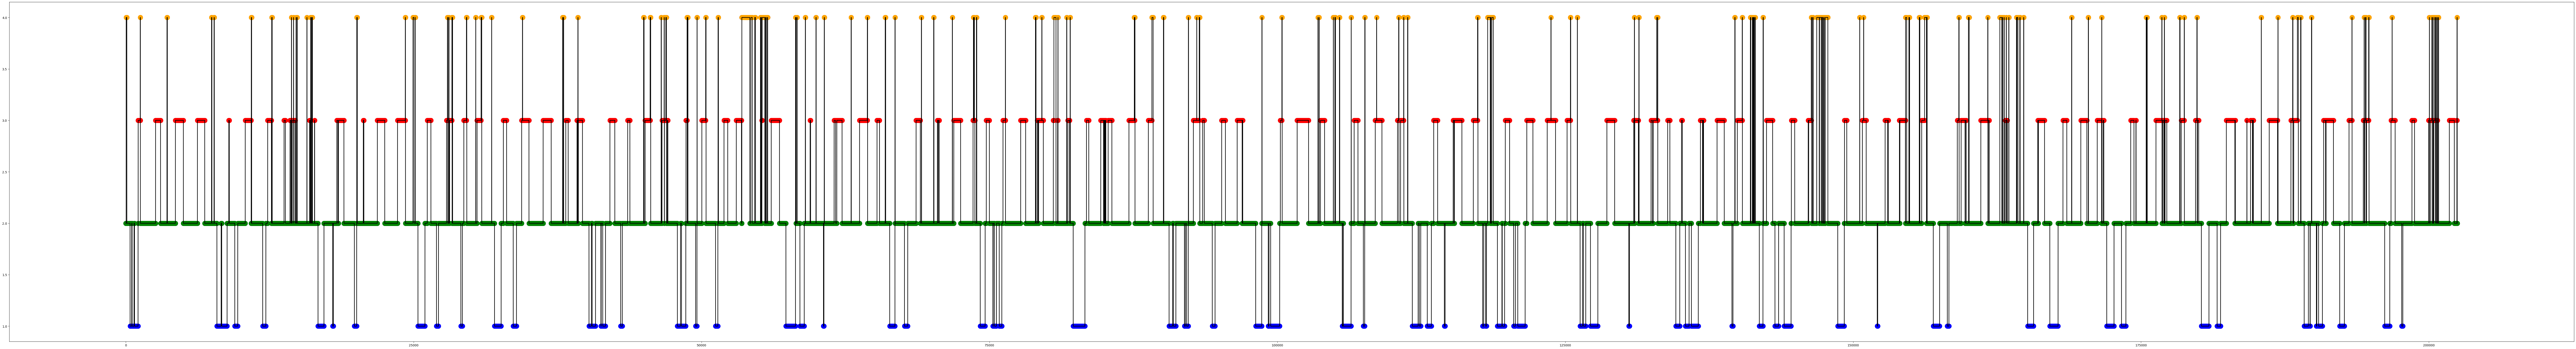

In [ ]:
y = ts
x = np.arange(len(y))

# 생성 제외할 값의 기준
threshold = 2
core= 2 
deep = 1
inbed = 0
rem = 3
awake = 4

# line plot
plt.figure(figsize=(150,20))
plt.plot(x, y, color='black',linewidth=2)

below_threshold =  y > threshold
below_core = core<=y
below_deep = deep<=y
below_rem = rem<=y
below_awake = awake<=y

# Add above threshold markers
plt.scatter(x[below_deep], y[below_deep], color='blue',linewidth=10) 
plt.scatter(x[below_core], y[below_core], color='green',linewidth=10) 
plt.scatter(x[below_rem], y[below_rem], color='red',linewidth=10) 
plt.scatter(x[below_awake], y[below_awake], color='orange',linewidth=10) 


In [ ]:
coreduration.std()

0.37384655715076553

In [ ]:
InBed = data[data["Value"]=='InBed']
NHC = InBed[InBed["Source"] == 'NHC']

Watch = data[data["Source"] != 'NHC']
Watch = Watch[Watch['Value'] != "InBed"]

In [ ]:
Watch['Start'] = pd.to_datetime(Watch['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
Watch['End'] = pd.to_datetime(Watch['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
# duration, Source 삭제
watch_drop=Watch.drop(columns=['Duration (hr)', 'Source']) 

In [ ]:
Watch.columns

Index(['Start', 'End', 'Duration (hr)', 'Value', 'Source'], dtype='object')

In [ ]:
watch_drop['Value']= watch_drop['Value'].replace('Core',2)
watch_drop['Value']= watch_drop['Value'].replace('REM',3)
watch_drop['Value']= watch_drop['Value'].replace('Deep',1)
watch_drop['Value']= watch_drop['Value'].replace('Awake',4)

In [ ]:
watch_drop

In [ ]:
watch_drop.head(45)

In [ ]:
start_date = '2023-02-25 12:00:00'
end_date = '2023-03-26 12:00:00'
first = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]

In [ ]:
start_date = '2023-03-26 12:00:00'
end_date = '2023-04-21 12:00:00'
second = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]

In [ ]:
second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 1573 to 2580
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Start   786 non-null    datetime64[ns]
 1   End     786 non-null    datetime64[ns]
 2   Value   786 non-null    int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 24.6 KB


In [ ]:
second.head()

,Start,End,Value
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,2
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,4
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,2
1579,2023-03-27 00:20:39,2023-03-27 00:29:09,1
1580,2023-03-27 00:29:09,2023-03-27 00:31:09,2


<Axes: xlabel='Start'>

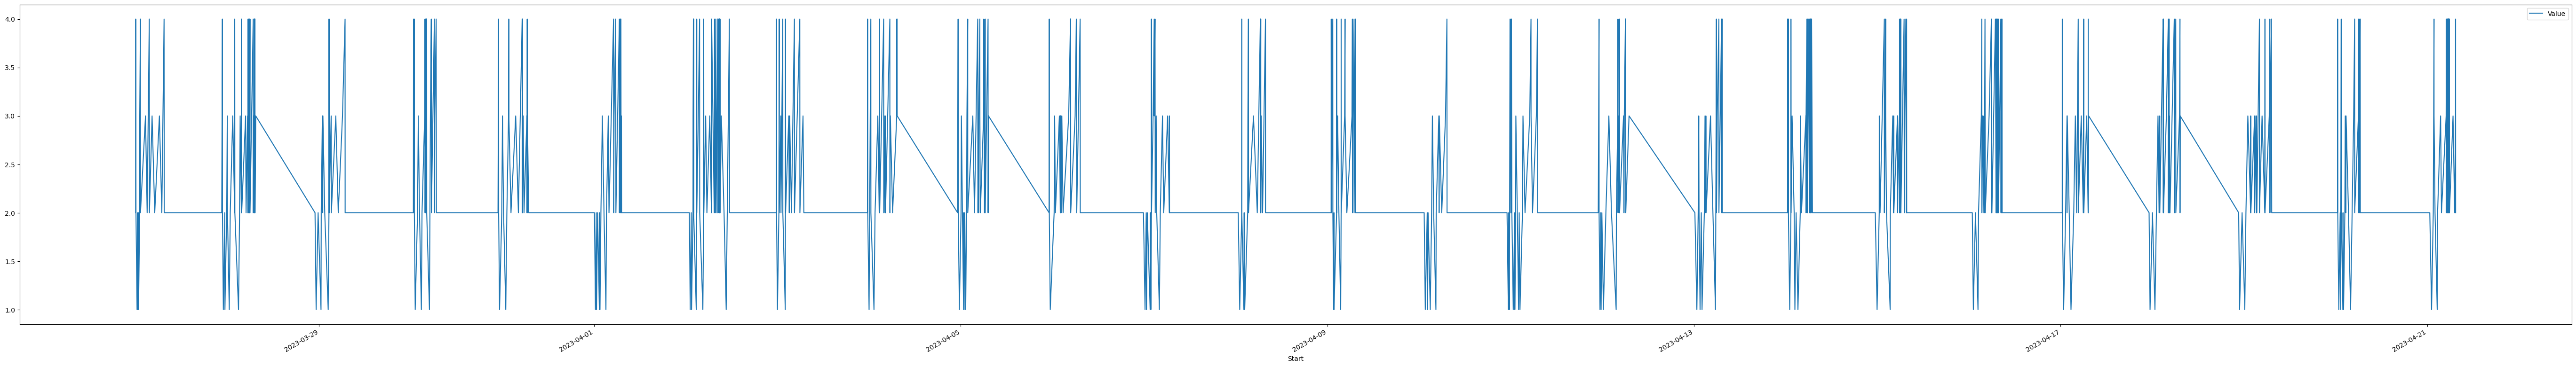

In [ ]:
second.plot(x='Start',y='Value',figsize=(70,10))

In [ ]:
start_date = '2023-03-26 12:00:00'
end_date = '2023-03-29 12:00:00'
test = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]
test
test.plot(x='Start',y='Value')

TypeError: ignored

<Axes: xlabel='Start'>

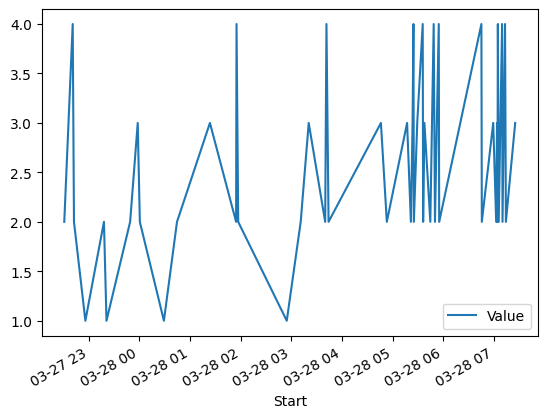

In [ ]:
start_date = '2023-03-27 12:00:00'
end_date = '2023-03-28 12:00:00'
test2 = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]
test2
test2.plot(x='Start',y='Value')

<Axes: xlabel='Start'>

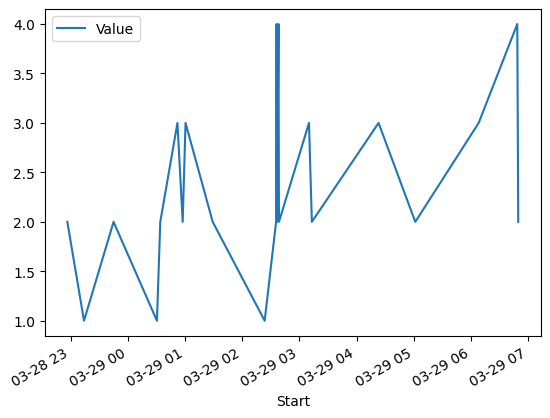

In [ ]:
start_date = '2023-03-28 12:00:00'
end_date = '2023-03-29 12:00:00'
test3 = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]
test3
test3.plot(x='Start',y='Value')

<Axes: xlabel='Start', ylabel='Value'>

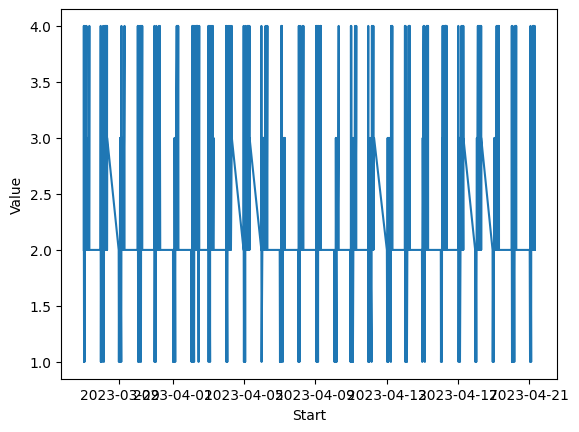

In [ ]:
sns.lineplot(data=second,x='Start',y='Value')

In [ ]:
test['day'] = test['Start'].dt.day

<ipython-input-20-aa7c8016b0c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['day'] = test['Start'].dt.day


In [ ]:
test.head(5)

,Start,End,Value,day
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,2,26
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,4,27
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,2,27
1579,2023-03-27 00:20:39,2023-03-27 00:29:09,1,27
1580,2023-03-27 00:29:09,2023-03-27 00:31:09,2,27


In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='YM', y = 'PM2.5',
                  hue='District', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('PM2.5 (µg/m3)')
plt.xlabel('Year-Month')
plt.show()

In [ ]:
data

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,Core,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,Deep,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,Core,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,Deep,Sujeong의 Apple Watch
...,...,...,...,...,...
2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,REM,Sujeong의 Apple Watch
2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,Core,Sujeong의 Apple Watch
2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,Awake,Sujeong의 Apple Watch
2953,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,Core,Sujeong의 Apple Watch
